## DEADLINE:
Vous êtes Développeur IA indépendant chez un marchand de vins de renom qui dispose d’un site internet pour ses ventes. 
Votre rôle est d’accompagner votre client dans sa transformation digitale.

Dans un premier temps j'importe mes bibliothèques:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import sklearn.metrics as sm

from pandas_profiling import ProfileReport
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets


### Création des DataFrames

In [2]:
df_erp = pd.read_excel('erp.xlsx')
df_liaison = pd.read_excel('liaison.xlsx')
df_web = pd.read_excel('web.xlsx')
df_web = df_web.drop_duplicates()
df_web.rename(columns={'sku': 'id_web'}, inplace=True)
print(df_erp)
print(df_liaison)
print(df_web)


C:\Users\admin\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


     product_id  onsale_web  price  stock_quantity stock_status
0          3847           1   24.2               0   outofstock
1          3849           1   34.3               0   outofstock
2          3850           1   20.8               0   outofstock
3          4032           1   14.1               0   outofstock
4          4039           1   46.0               0   outofstock
..          ...         ...    ...             ...          ...
820        7203           0   45.0              30      instock
821        7204           0   45.0               9      instock
822        7247           1   54.8              23      instock
823        7329           0   26.5              14      instock
824        7338           1   16.3              45      instock

[825 rows x 5 columns]
     product_id   id_web
0          3847    15298
1          3849    15296
2          3850    15300
3          4032    19814
4          4039    19815
..          ...      ...
820        7203      NaN
821     

### Je fais la Jointure des tables 

In [3]:
df_merge = df_erp.merge(df_liaison)
print(df_merge)
df_merge = df_merge.merge(df_web)
print(df_merge)

     product_id  onsale_web  price  stock_quantity stock_status   id_web
0          3847           1   24.2               0   outofstock    15298
1          3849           1   34.3               0   outofstock    15296
2          3850           1   20.8               0   outofstock    15300
3          4032           1   14.1               0   outofstock    19814
4          4039           1   46.0               0   outofstock    19815
..          ...         ...    ...             ...          ...      ...
820        7203           0   45.0              30      instock      NaN
821        7204           0   45.0               9      instock      NaN
822        7247           1   54.8              23      instock  13127-1
823        7329           0   26.5              14      instock  14680-1
824        7338           1   16.3              45      instock    16230

[825 rows x 6 columns]
      product_id  onsale_web  price  stock_quantity stock_status   id_web  \
0           3847       

### Supression des colonnes comportant des valeurs null après analyse

In [4]:
df_drop = df_merge.drop(columns=['tax_class',
                                 'post_content',
                                 'post_password',
                                 'post_content_filtered',
                                 'post_mime_type',])
df_drop = df_drop.dropna()
print(df_drop)

      product_id  onsale_web  price  stock_quantity stock_status   id_web  \
0           3847           1   24.2               0   outofstock    15298   
2           3849           1   34.3               0   outofstock    15296   
4           3850           1   20.8               0   outofstock    15300   
6           4032           1   14.1               0   outofstock    19814   
8           4039           1   46.0               0   outofstock    19815   
...          ...         ...    ...             ...          ...      ...   
1691        6930           1    8.4              83      instock    16135   
1693        7023           1   27.5              15      instock    15891   
1695        7025           1   69.0               2      instock    15887   
1697        7247           1   54.8              23      instock  13127-1   
1699        7338           1   16.3              45      instock    16230   

      virtual  downloadable  rating_count  average_rating  ...  \
0        

### Création d'un report des tables

In [5]:
profile = ProfileReport(df_drop, title="Wine Sprit Report", explorative=True)
profile.to_file("winespiritreport.html")


Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Calcule du Chiffre d'affaire
Je créer un DataFrame où je fait le prix fois le total des ventes.
J'insert dans ma table une colonne où j'y insert mon DataFrame créé
Ensuite je créer une liste où j'y insert la somme de la colonne que j'ai créer (chiffre_affaire)

In [6]:
df_affaire = df_drop["price"] * df_drop["total_sales"]
df_drop["chiffre_affaire"] = df_affaire
print(df_drop['chiffre_affaire'])
chiffre = sum(df_drop['chiffre_affaire'])
print("le chiffre d'affaire total est : " + str(chiffre) + "€")

0       145.2
2         0.0
4         0.0
6        42.3
8         0.0
        ...  
1691     42.0
1693      0.0
1695      0.0
1697      0.0
1699      0.0
Name: chiffre_affaire, Length: 714, dtype: float64
le chiffre d'affaire total est : 70568.6€


### Méthodes du z score

In [7]:
df_drop['zscore'] = (df_drop['price'] - df_drop['price'].mean())/df_drop['price'].std(ddof=0)
print(df_drop['price'] [df_drop['zscore'] > 2])
print(len(df_drop['price'] [df_drop['zscore'] > 2]))

399     100.0
403      88.4
671     225.0
675     126.5
709     176.0
711     108.5
715     157.0
717     104.0
727     109.6
1033    102.3
1035    137.0
1125    217.5
1135    105.0
1137    105.0
1147    112.0
1277     92.0
1295    124.8
1379    175.0
1447    191.3
1477     93.0
1479    122.0
1481    114.0
1557    135.0
1567    105.6
1569    116.4
1579    115.0
1581    121.0
1583     99.0
1585    115.0
1587    121.0
Name: price, dtype: float64
30


### Création d'un boxplot avec seaborn sur la colonne price

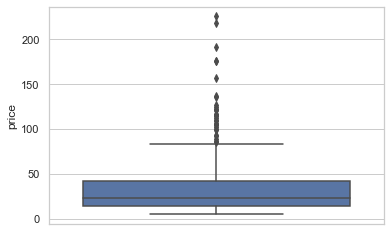

In [8]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=df_drop["price"])

### Création nuage de points avec les outliers d'une couleur différente

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='chiffre_affaire'>

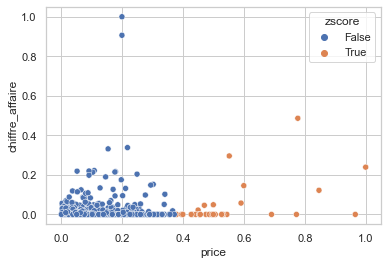

In [30]:
y = df_drop['chiffre_affaire']
x = df_drop['price'] 
sns.scatterplot(x, y, hue=df_drop['zscore'] > 2)

### Méthodes interquartiles
J'obtiens 32 outliers qui sont cohérents 

In [10]:
    Q1=df_drop['price'].quantile(0.25)
    Q3=df_drop['price'].quantile(0.75)
    IQR=Q3-Q1
    df_final=df_drop['price'][((df_drop['price']<(Q1-1.5*IQR)) | (df_drop['price']>(Q3+1.5*IQR)))]
    print(df_final)
    print(len(df_final))

399     100.0
403      88.4
671     225.0
675     126.5
683      85.6
709     176.0
711     108.5
715     157.0
717     104.0
727     109.6
1033    102.3
1035    137.0
1125    217.5
1135    105.0
1137    105.0
1147    112.0
1149     86.8
1277     92.0
1295    124.8
1379    175.0
1447    191.3
1477     93.0
1479    122.0
1481    114.0
1557    135.0
1567    105.6
1569    116.4
1579    115.0
1581    121.0
1583     99.0
1585    115.0
1587    121.0
Name: price, dtype: float64
32


### Méthodes K-means cluster

No handles with labels found to put in legend.


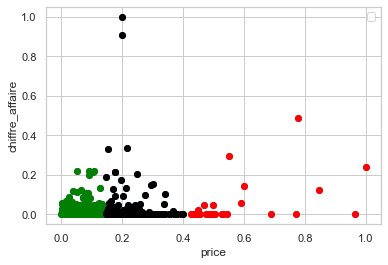

In [24]:
scaler = MinMaxScaler()
scaler.fit(df_drop[['chiffre_affaire']])
df_drop['chiffre_affaire'] = scaler.transform(df_drop[['chiffre_affaire']])
#wine_profile
scaler.fit(df_drop[['price']])
df_drop['price'] = scaler.transform(df_drop[['price']])
df_drop
plt.scatter(df_drop.price,df_drop['chiffre_affaire'])
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_drop[['price','chiffre_affaire']])
y_predicted
df_drop['cluster']=y_predicted
df_drop.head()
km.cluster_centers_
df1 = df_drop[df_drop.cluster==0]
df2 = df_drop[df_drop.cluster==1]
df3 = df_drop[df_drop.cluster==2]
plt.scatter(df1.price,df1['chiffre_affaire'],color='green')
plt.scatter(df2.price,df2['chiffre_affaire'],color='red')
plt.scatter(df3.price,df3['chiffre_affaire'],color='black')
plt.xlabel('price')
plt.ylabel('chiffre_affaire')
plt.legend()